In [1]:
'''Visualize all datasets'''
import sys
import os
from datasets import get_dataset, clusters, half_doughnuts
from data_utils import show_random
from matplotlib import pyplot as plt
%matplotlib inline

Dataset sizes: 	 train: 50 	 val: 0 	 test: 10
Batch size: 	 16
torch.Size([1, 32, 32])
Label:  tensor(8)


C:\Users\user\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


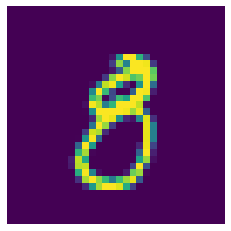

torch.Size([1, 32, 32])
Label:  tensor(8)


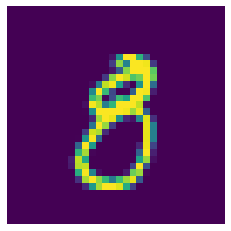

torch.Size([1, 32, 32])
Label:  tensor(0)


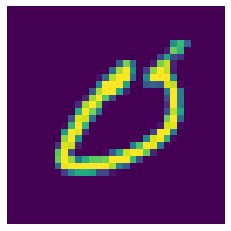

torch.Size([1, 32, 32])
Label:  tensor(9)


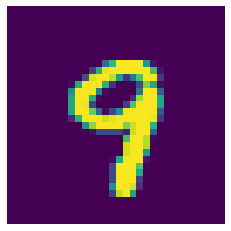

torch.Size([1, 32, 32])
Label:  tensor(6)


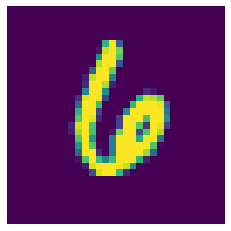

In [2]:
train, val, test = get_dataset("mnist")
show_random(test, 5)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dataset sizes: 	 train: 50 	 val: 0 	 test: 10
Batch size: 	 16
torch.Size([3, 32, 32])
Label:  tensor(6)


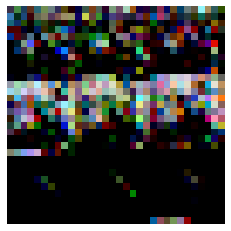

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32])
Label:  tensor(4)


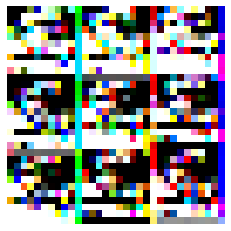

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32])
Label:  tensor(6)


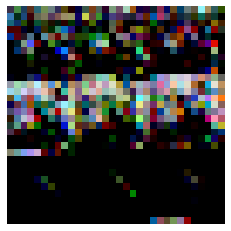

torch.Size([3, 32, 32])
Label:  tensor(0)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


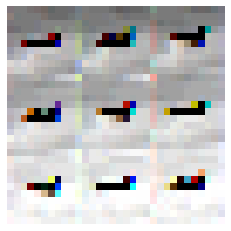

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32])
Label:  tensor(1)


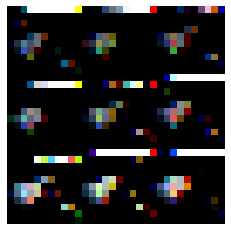

In [3]:
train, val, test = get_dataset("cifar10")
show_random(test, 5)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dataset sizes: 	 train: 50 	 val: 0 	 test: 10
Batch size: 	 16
torch.Size([3, 32, 32])
Label:  tensor(83)


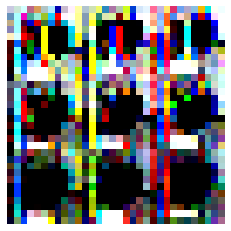

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32])
Label:  tensor(25)


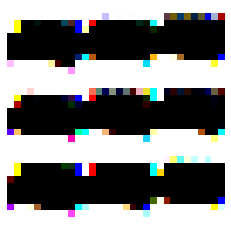

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32])
Label:  tensor(37)


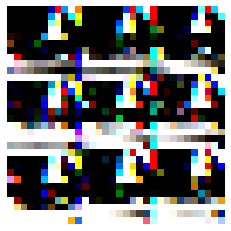

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32])
Label:  tensor(25)


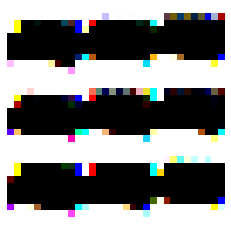

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32])
Label:  tensor(83)


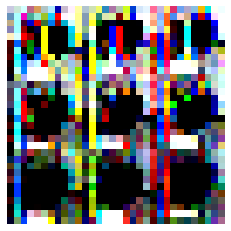

In [4]:
train, val, test = get_dataset("cifar100")
show_random(test, 5)

Dataset sizes: 	 train: 50 	 val: 0 	 test: 10
Batch size: 	 16
torch.Size([1, 32, 32])
Label:  tensor(3)


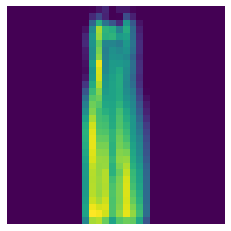

torch.Size([1, 32, 32])
Label:  tensor(4)


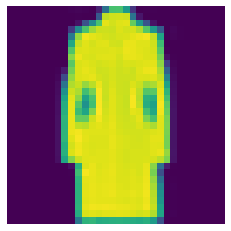

torch.Size([1, 32, 32])
Label:  tensor(1)


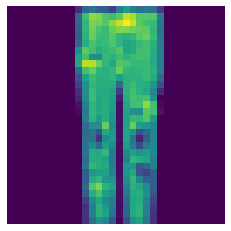

torch.Size([1, 32, 32])
Label:  tensor(1)


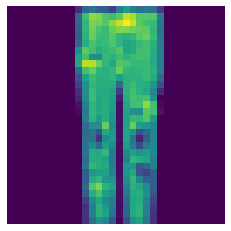

torch.Size([1, 32, 32])
Label:  tensor(0)


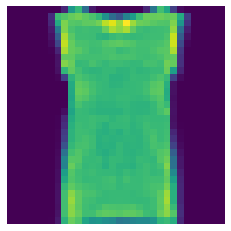

In [5]:
train, val, test = get_dataset("fashion-mnist")
show_random(test, 5)

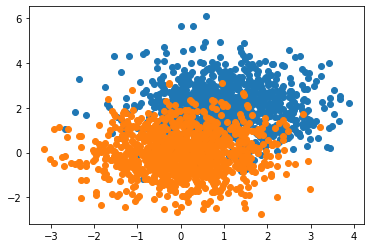

In [6]:
(x1, y1), (x2, y2) = clusters()
plt.scatter(x1, y1)
plt.scatter(x2, y2)

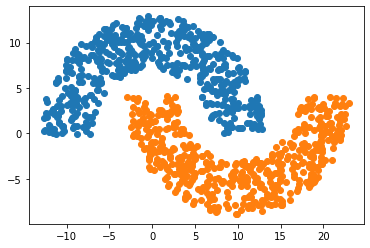

In [7]:
(x1, y1), (x2, y2) = half_doughnuts(500, 500)
plt.scatter(x1, y1)
plt.scatter(x2, y2)